In [8]:
! unzip /content/X_ray_train.zip

Archive:  /content/X_ray_train.zip
   creating: train/
  inflating: train/.DS_Store         
  inflating: __MACOSX/train/._.DS_Store  
   creating: train/random/
  inflating: __MACOSX/train/._random  
   creating: train/xray/
  inflating: train/random/dog.jpg    
  inflating: __MACOSX/train/random/._dog.jpg  
  inflating: train/random/street.jpg  
  inflating: __MACOSX/train/random/._street.jpg  
  inflating: train/random/sunflower.jpg  
  inflating: __MACOSX/train/random/._sunflower.jpg  
  inflating: train/random/1fnl.ru.jpg  
  inflating: __MACOSX/train/random/._1fnl.ru.jpg  
  inflating: train/random/1k62.com.jpg  
  inflating: __MACOSX/train/random/._1k62.com.jpg  
  inflating: train/random/.DS_Store  
  inflating: __MACOSX/train/random/._.DS_Store  
  inflating: train/random/4-season.info.jpg  
  inflating: __MACOSX/train/random/._4-season.info.jpg  
  inflating: train/random/rose.jpg   
  inflating: __MACOSX/train/random/._rose.jpg  
  inflating: train/random/1duro.com.jpg  
  i

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
seed(1337)
from tensorflow.python.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.python.keras.applications.mobilenet_v2 import preprocess_input
#from tensorflow.python.keras.applications import densenet
#from tensorflow.python.keras.applications.densenet import preprocess_input
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.python.keras import layers, models, Model, optimizers,Input
from tensorflow.python.keras.layers import GlobalAveragePooling2D,Dropout


Text(0.5, 1.0, 'Number of training images per category:')

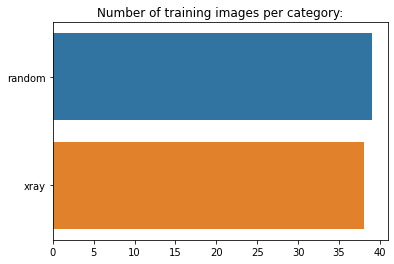

In [13]:
category_names = sorted(os.listdir('/content/train'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/content/train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

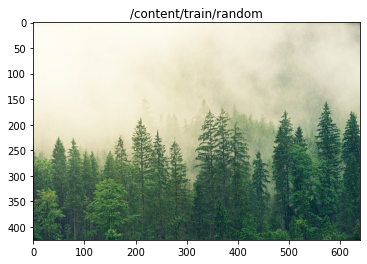

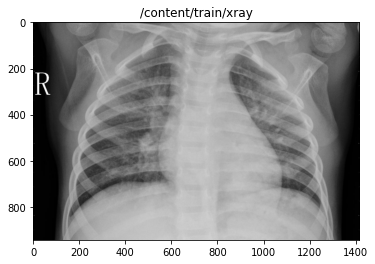

In [14]:
for subdir, dirs, files in os.walk('/content/train'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file)
        plt.figure()
        plt.title(subdir)
        plt.imshow(image)
        break

In [15]:
img_height, img_width = 224,224

preprocess


In [19]:
train_data_dir  = '/content/train'

In [20]:
batch_size = 64
train_datagen =  ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    rescale=1./255,
    rotation_range=10, 
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip=True, 
)

print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size=batch_size,
class_mode = "categorical")

Total number of images for "training":
Found 77 images belonging to 2 classes.


In [29]:
learning_rate = 1e-3
epochs = 11

In [30]:
img_height, img_width = 224,224
conv_base=MobileNetV2(weights='imagenet',pooling='avg',include_top=False, input_shape = (img_width, img_height, 3))

In [31]:
for layer in conv_base.layers:
    layer.trainable=False
#Not Training existing weights of Keras Model (Transfer Learning)

In [32]:
model = models.Sequential()
model.add(conv_base)
model.add(Dropout(0.5))
model.add(layers.Dense(nb_categories, activation='sigmoid'))

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model.save('/content/mobile-xray.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [35]:
history=model.fit(train_generator,epochs=epochs)

Epoch 1/11
2/2 [==============================] - 5s 213ms/step - loss: 1.0139 - accuracy: 0.4286
Epoch 2/11
2/2 [==============================] - 2s 1s/step - loss: 0.7632 - accuracy: 0.6364
Epoch 3/11
2/2 [==============================] - 2s 1s/step - loss: 0.7116 - accuracy: 0.7013
Epoch 4/11
2/2 [==============================] - 1s 196ms/step - loss: 0.6150 - accuracy: 0.8052
Epoch 5/11
2/2 [==============================] - 1s 189ms/step - loss: 0.4678 - accuracy: 0.8701
Epoch 6/11
2/2 [==============================] - 2s 1s/step - loss: 0.4004 - accuracy: 0.8831
Epoch 7/11
2/2 [==============================] - 1s 147ms/step - loss: 0.3735 - accuracy: 0.9091
Epoch 8/11
2/2 [==============================] - 1s 199ms/step - loss: 0.3268 - accuracy: 0.9221
Epoch 9/11
2/2 [==============================] - 1s 162ms/step - loss: 0.3175 - accuracy: 0.9221
Epoch 10/11
2/2 [==============================] - 1s 183ms/step - loss: 0.2462 - accuracy: 0.9351
Epoch 11/11
2/2 [===========

In [36]:
train_generator.class_indices

{'random': 0, 'xray': 1}

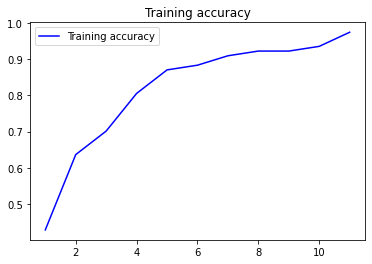

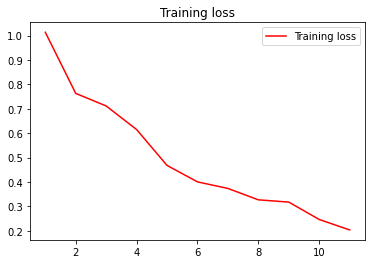

In [37]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc,'b', label = 'Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'r', label = 'Training loss')
plt.title('Training loss')
plt.legend()

In [38]:
model.save('/content/model1-check-XRAY.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
